In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('heart.csv')

In [84]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [85]:
df.shape

(918, 12)

In [86]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [87]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [88]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [89]:
df.duplicated().any()

False

In [90]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [91]:
df['Sex'] = df['Sex'].replace(['M'],'0')

In [92]:
df['Sex'] = df['Sex'].replace(['F'],'1')

In [93]:
df.Sex.value_counts()

0    725
1    193
Name: Sex, dtype: int64

In [94]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N'],'0')

In [95]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['Y'],'1')

In [96]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


<AxesSubplot:>

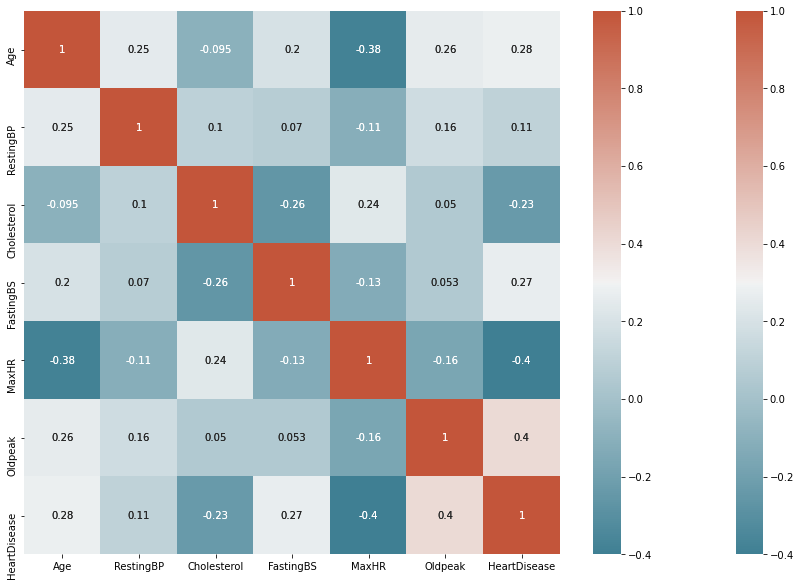

In [97]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

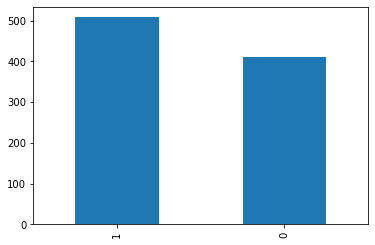

In [98]:
df['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

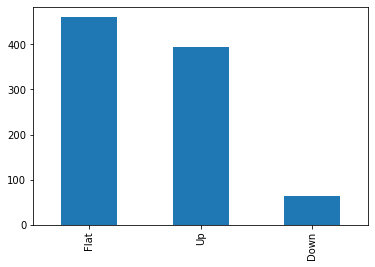

In [99]:
df['ST_Slope'].value_counts().plot(kind='bar')
plt.show()

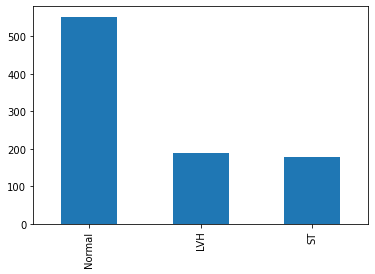

In [100]:
df['RestingECG'].value_counts().plot(kind='bar')
plt.show()

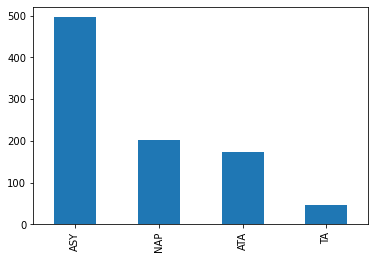

In [101]:
df['ChestPainType'].value_counts().plot(kind='bar')
plt.show()

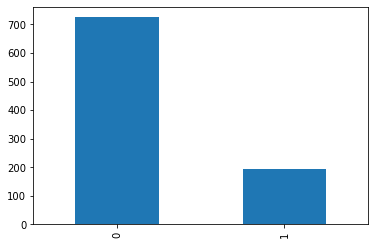

In [102]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

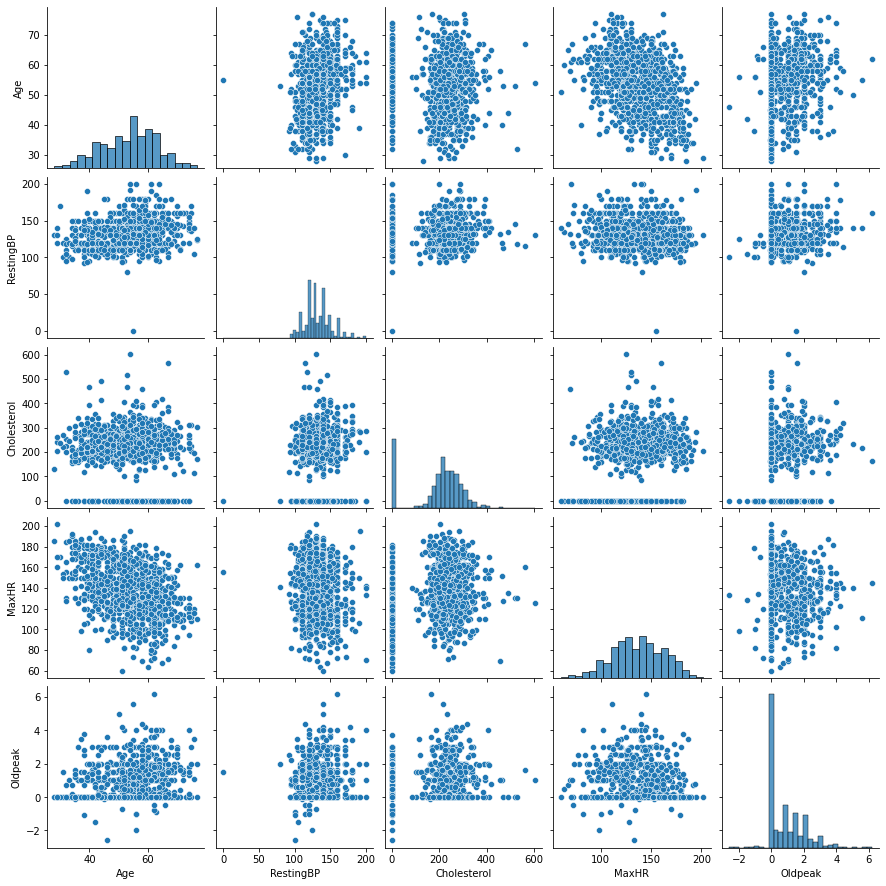

In [103]:
subData = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
sns.pairplot(subData)

In [104]:
with_heart_disease = df[df['HeartDisease']==1]
with_heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [105]:
without_heart_disease = df[df['HeartDisease']==0]
without_heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


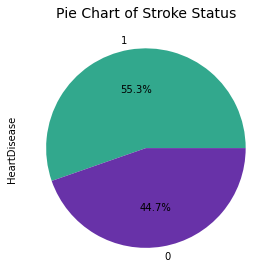

In [106]:
plt.figure(figsize= (4,4))
df.HeartDisease.value_counts().plot.pie(autopct= '%1.1f%%', colors= ['#32a88d','#6832a8'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

In [111]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df.Sex= le.fit_transform(df.Sex)
df.Age= le.fit_transform(df.Age)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.FastingBS= le.fit_transform(df.FastingBS)
df.MaxHR= le.fit_transform(df.MaxHR)

df_encode= df
df_encode.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,0,ATA,140,147,0,Normal,98,0,0.0,Up,0
1,21,1,NAP,160,40,0,Normal,82,0,1.0,Flat,1
2,9,0,ATA,130,141,0,ST,25,0,0.0,Up,0
3,20,1,ASY,138,72,0,Normal,34,1,1.5,Flat,1
4,26,0,NAP,150,53,0,Normal,48,0,0.0,Up,0


In [112]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [113]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [114]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [115]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [116]:
x = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [117]:
x.shape

(918, 11)

In [118]:
y.shape

(918,)

In [119]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [120]:

features = df[['Age', 'Sex', 'RestingBP','Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak']]
x = df[['Age', 'Sex', 'RestingBP','Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak']]
y = df['HeartDisease']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [121]:
model = LogisticRegression()

In [122]:
model.fit(x_train, y_train)

LogisticRegression()

In [123]:
model.score(x_train, y_train)

0.8038147138964578

In [124]:
predit= model.predict(x_test)
print(predit)

[1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(x_test)

array([[ 0.14640812, -0.51740017, -0.95050604, ...,  0.72307486,
        -0.83375663, -0.75922896],
       [ 1.32497163, -0.51740017, -0.67960776, ...,  0.56370636,
        -0.83375663, -0.47271274],
       [-0.28216042, -0.51740017, -1.22140432, ..., -1.74713688,
        -0.83375663, -0.85473437],
       ...,
       [-0.17501829, -0.51740017, -1.11304501, ...,  0.92228548,
        -0.83375663, -0.85473437],
       [-1.78215034, -0.51740017, -0.1378112 , ..., -1.50808413,
        -0.83375663, -0.85473437],
       [-0.06787615, -0.51740017,  1.48757849, ..., -0.59171526,
         1.19939076, -0.85473437]])

In [126]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test))
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

Confusion Matrix : 

 [[66 24]
 [11 83]]
Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.73      0.79        90
           1       0.78      0.88      0.83        94

    accuracy                           0.81       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184
 



In [127]:
import pickle
pickle.dump(svm, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

SVC()
